In [19]:
#imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

#image paths
img1_path = "/content/IMG_1863.JPG"
img2_path = "/content/IMG_1864.JPG"

# Image Acquisition

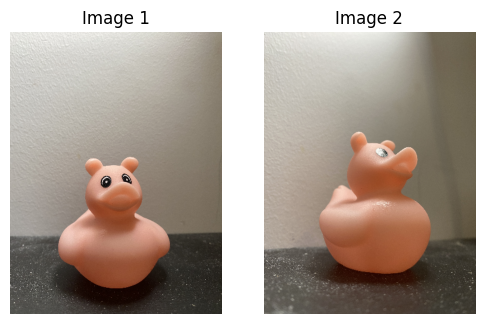

In [30]:
#loading image to obtain the original size
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

#Making the image 1/8 of its size to help visualize the effects of the following tasks
original_height, original_width = img1.shape[:2]
new_width = int(original_width/8)
new_height = int(original_height/8)

img1_resized = cv2.resize(img1, (new_width, new_height))
img2_resized = cv2.resize(img2, (new_width, new_height))

#displaying image
plt.figure(figsize=(6, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1_resized, cv2.COLOR_BGR2RGB))
plt.title("Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2_resized, cv2.COLOR_BGR2RGB))
plt.title("Image 2")
plt.axis('off')
plt.show()

# Convert to Grayscale

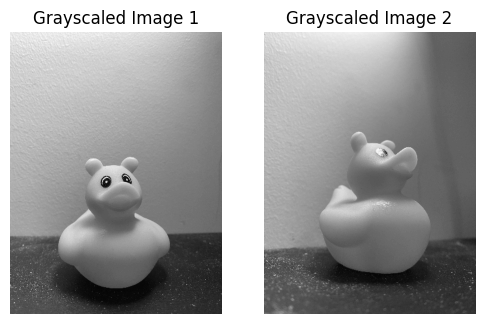

In [31]:
#converting the image to grayscale
img1_gray = cv2.cvtColor(img1_resized, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)

#displaying image
plt.figure(figsize=(6, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1_gray, cmap="gray")
plt.title("Grayscaled Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_gray, cmap="gray")
plt.title("Grayscaled Image 2")
plt.axis('off')
plt.show()

# Smooth the images using Gaussian smoothing

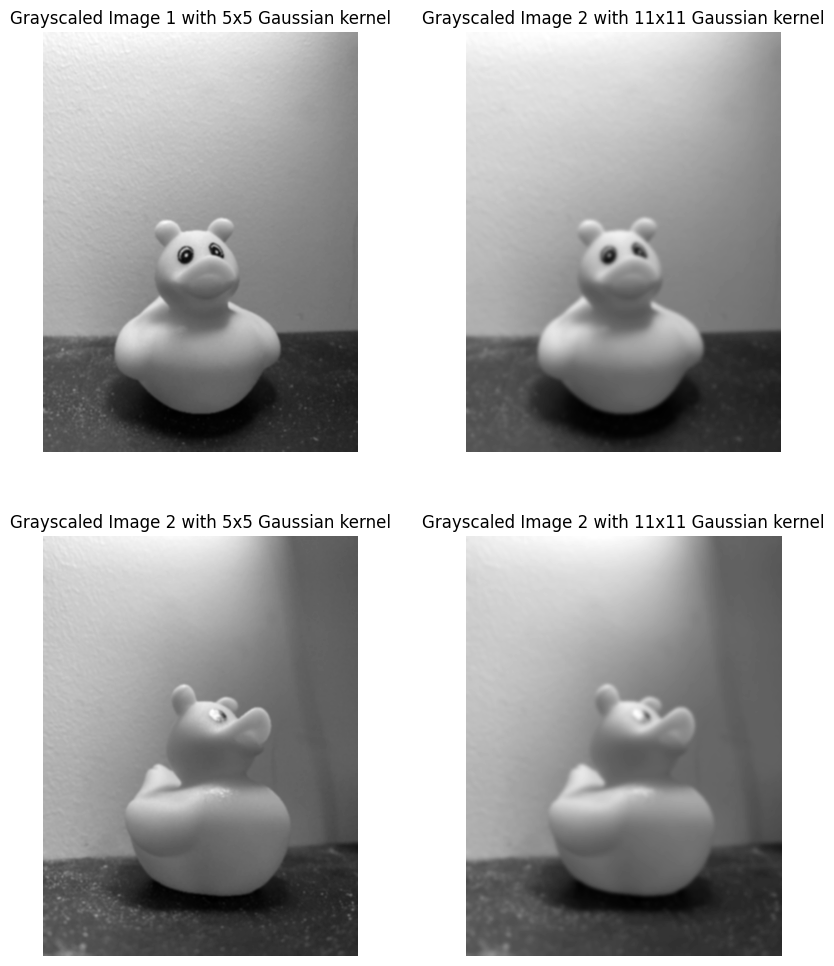

In [32]:
#smothing the grayscale images using Gaussian Kernel
img1_gray_5 = cv2.GaussianBlur(img1_gray, (5, 5), 0)
img1_gray_11 = cv2.GaussianBlur(img1_gray, (11, 11), 0)
img2_gray_5 = cv2.GaussianBlur(img2_gray, (5, 5), 0)
img2_gray_11 = cv2.GaussianBlur(img2_gray, (11, 11), 0)

#displaying the image
plt.figure(figsize=(10, 12))
plt.subplot(2, 2, 1)
plt.imshow(img1_gray_5, cmap="gray")
plt.title("Grayscaled Image 1 with 5x5 Gaussian kernel")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img1_gray_11, cmap="gray")
plt.title("Grayscaled Image 2 with 11x11 Gaussian kernel")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img2_gray_5, cmap="gray")
plt.title("Grayscaled Image 2 with 5x5 Gaussian kernel")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img2_gray_11, cmap="gray")
plt.title("Grayscaled Image 2 with 11x11 Gaussian kernel")
plt.axis('off')
plt.show()

# Compute Image Gradients

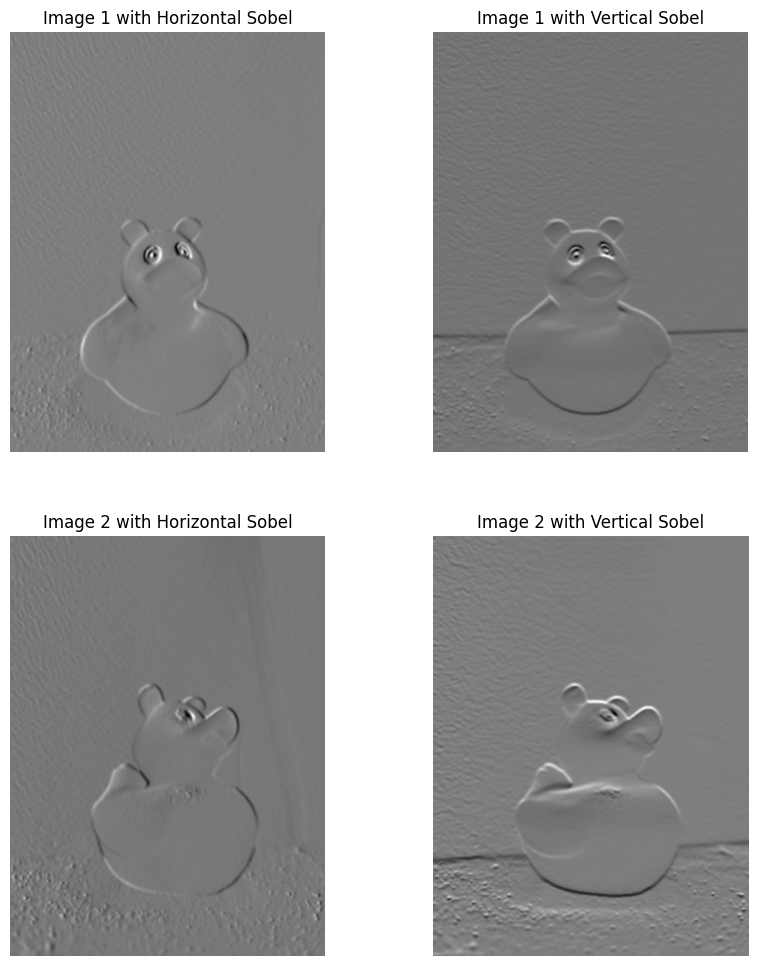

In [33]:
#Function to apply horizontal and vertical sobel filters on any image
def apply_sobel(img):
    dx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    dy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    return dx, dy

#Computing the x and y derivatives of each image
img1_gray_5_dx, img1_gray_5_dy = apply_sobel(img1_gray_5)
img2_gray_5_dx, img2_gray_5_dy = apply_sobel(img2_gray_5)

#Displaying the image
plt.figure(figsize=(10, 12))
plt.subplot(2, 2, 1)
plt.imshow(img1_gray_5_dx, cmap="gray")
plt.title("Image 1 with Horizontal Sobel")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img1_gray_5_dy, cmap="gray")
plt.title("Image 1 with Vertical Sobel")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img2_gray_5_dx, cmap="gray")
plt.title("Image 2 with Horizontal Sobel")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img2_gray_5_dy, cmap="gray")
plt.title("Image 2 with Vertical Sobel")
plt.axis('off')
plt.show()

# Compute the Edge Magnitude and Orientation

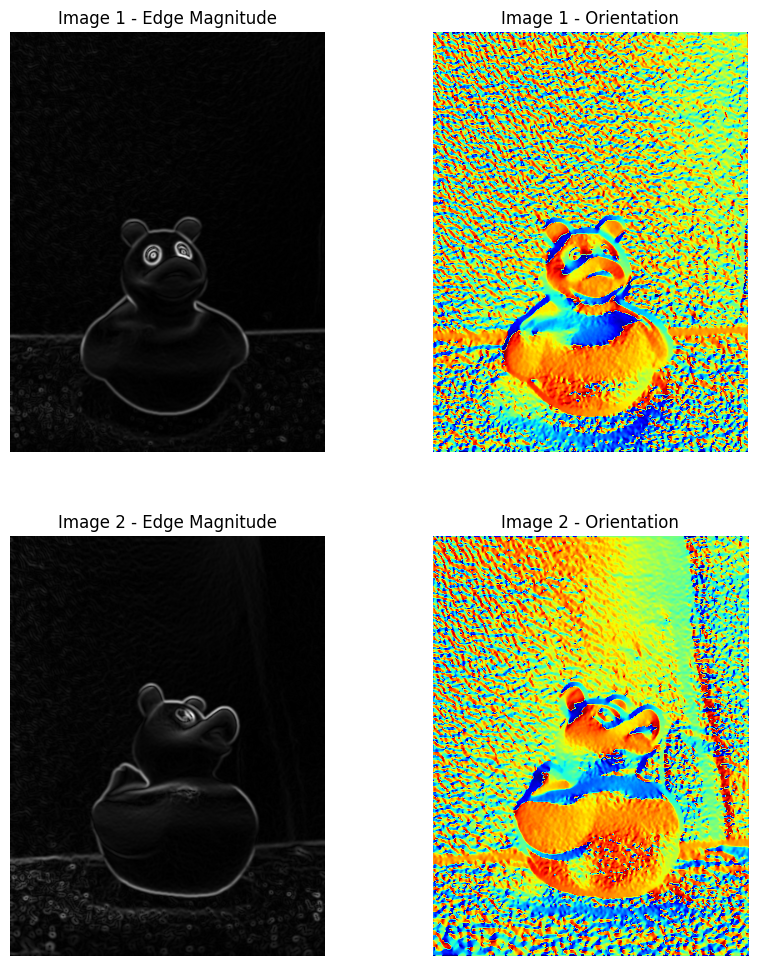

In [34]:
#Function to compute edge magnitude and orientation on any image given the x and y derivative images
def compute_edgeMagnitude_orientation(dx, dy):
    img_mag = cv2.magnitude(dx, dy)
    img_orient = cv2.phase(dx, dy)
    return img_mag, img_orient

#Computing the edge magnitude and orientation of each image
img1_mag, img1_orient = compute_edgeMagnitude_orientation(img1_gray_5_dx, img1_gray_5_dy)
img2_mag, img2_orient = compute_edgeMagnitude_orientation(img2_gray_5_dx, img2_gray_5_dy)

#Displaying the images
plt.figure(figsize=(10, 12))
plt.subplot(2, 2, 1)
plt.imshow(img1_mag, cmap="gray")
plt.title("Image 1 - Edge Magnitude")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img1_orient, cmap="jet")
plt.title("Image 1 - Orientation")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img2_mag, cmap="gray")
plt.title("Image 2 - Edge Magnitude")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img2_orient, cmap="jet")
plt.title("Image 2 - Orientation")
plt.axis('off')
plt.show()

# Canny Edge Detection with opencv

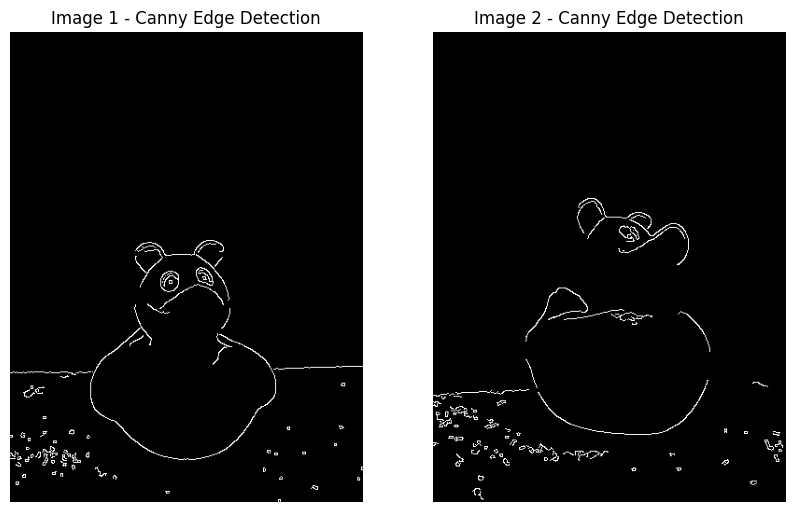

In [35]:
#Applying the canny edge detection on each image
img1_cannyEdge = cv2.Canny(img1_gray_5, 50, 100)
img2_cannyEdge = cv2.Canny(img2_gray_5, 50, 100)

#Displaying the images
plt.figure(figsize=(10, 12))
plt.subplot(1, 2, 1)
plt.imshow(img1_cannyEdge, cmap="gray")
plt.title("Image 1 - Canny Edge Detection")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_cannyEdge, cmap="gray")
plt.title("Image 2 - Canny Edge Detection")
plt.axis('off')
plt.show()